In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
import keras
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Preparing data

In [2]:
df = pd.read_csv('Airlines.csv')
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


In [3]:
df.columns

Index(['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek',
       'Time', 'Length', 'Delay'],
      dtype='object')

In [4]:
df.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [5]:
df.dtypes

id              int64
Airline        object
Flight          int64
AirportFrom    object
AirportTo      object
DayOfWeek       int64
Time            int64
Length          int64
Delay           int64
dtype: object

In [6]:
df.drop(columns=['id'], inplace=True)

In [7]:
df1 = df['Airline'].value_counts()
df1

Airline
WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: count, dtype: int64

In [8]:
len(df1)

18

In [9]:
df2=df['Flight'].value_counts()

In [10]:
len(df2)

6585

In [11]:
cols = df.columns
for i in range(0,len(cols)):
    print(df[cols[i]].value_counts(),'\n')
    print('********************************************\n')

Airline
WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: count, dtype: int64 

********************************************

Flight
16      420
5       407
9       401
8       396
62      364
       ... 
7814      1
3573      1
4385      1
3292      1
6969      1
Name: count, Length: 6585, dtype: int64 

********************************************

AirportFrom
ATL    34449
ORD    24822
DFW    22154
DEN    19843
LAX    16657
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: count, Length: 293, dtype: int64 

********************************************

AirportTo
ATL    34440
ORD    24871
DFW    22153
DEN    19848
LAX    16656
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: count, Length: 293, dtype: int64 

***************************************

In [12]:
le = preprocessing.LabelEncoder()

df['Airline'] = le.fit_transform(df['Airline'])
df['AirportFrom'] = le.fit_transform(df['AirportFrom'])
df['AirportTo'] = le.fit_transform(df['AirportTo'])

In [13]:
df.head(20)

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,4,269,253,135,3,15,205,1
1,14,1558,217,60,3,15,222,1
2,1,2400,154,80,3,20,165,1
3,1,2466,253,80,3,20,195,1
4,2,108,14,252,3,30,202,0
5,4,1094,154,135,3,30,181,1
6,5,1768,154,197,3,30,220,0
7,5,2722,217,85,3,30,228,0
8,5,2606,253,197,3,35,216,1
9,1,2538,153,208,3,40,200,1


# Visualize some features of data

<Axes: xlabel='Time', ylabel='Count'>

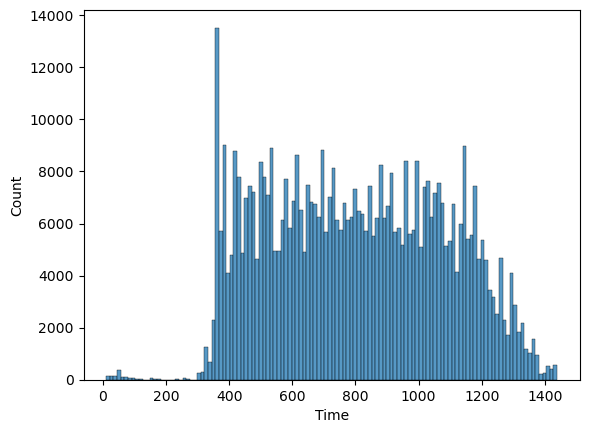

In [14]:
sns.histplot(df['Time'])

<Axes: xlabel='Length', ylabel='Count'>

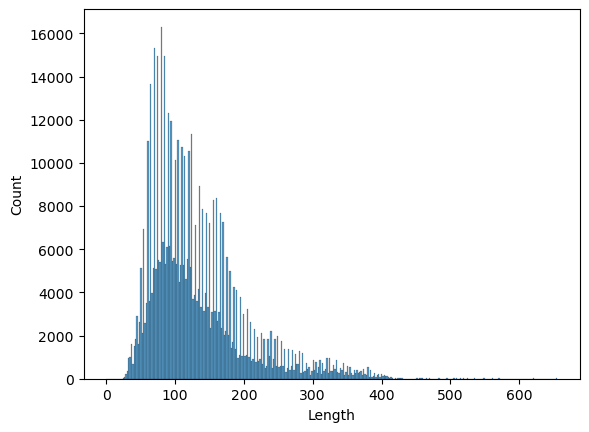

In [15]:
sns.histplot(df['Length'])

In [16]:
df['Length_by_hours'] = df['Length'] / 60
df['Time_by_hour'] = df['Time'] / 60

In [17]:
df.drop(columns=['Length', 'Time'], inplace=True)

<Axes: xlabel='Time_by_hour', ylabel='Count'>

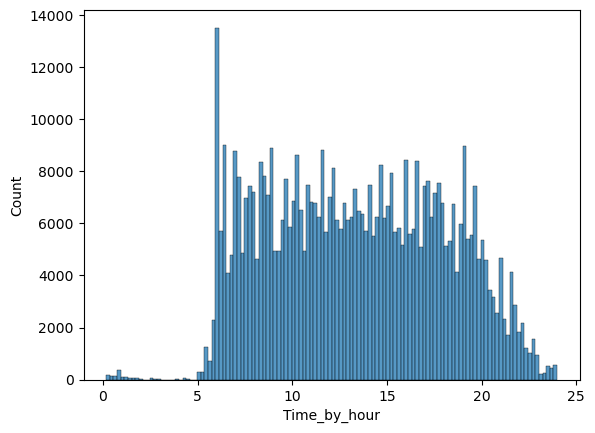

In [18]:
sns.histplot(df['Time_by_hour'])

<Axes: xlabel='Length_by_hours', ylabel='Count'>

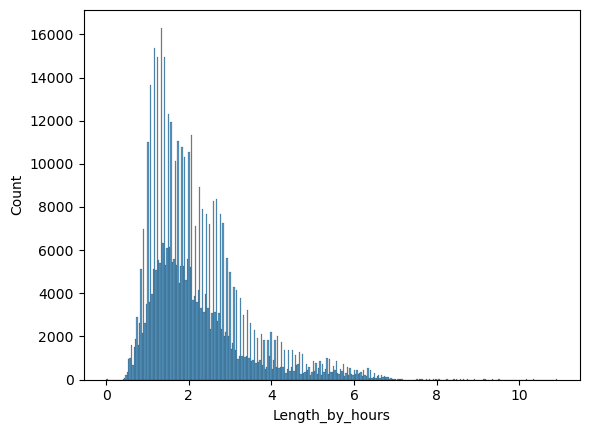

In [19]:
sns.histplot(df['Length_by_hours'])

# Feature extraction

In [20]:
#0 --> Morning | 1 --> Afternoon | 2 --> Evening | 3 --> Night

In [21]:
departure_period = []
for i in range(0,len(df)):
    if ((df['Time_by_hour'][i] >= 5) & (df['Time_by_hour'][i] < 12)):      
        departure_period.append(0)
        
    elif ((df['Time_by_hour'][i] >= 12) & (df['Time_by_hour'][i] < 17)):    
        departure_period.append(1)
        
    elif ((df['Time_by_hour'][i] >= 17) & (df['Time_by_hour'][i] < 21)): 
        departure_period.append(2)
        
    else: 
        departure_period.append(3)

df['Departure_period'] = departure_period

In [22]:
df['Departure_period'].value_counts() #depart புறப்படு

Departure_period
0    223289
1    170239
2    120044
3     25811
Name: count, dtype: int64

In [23]:
df['DayOfWeek'].value_counts()

DayOfWeek
4    91445
3    89746
5    85248
1    72769
2    71340
7    69879
6    58956
Name: count, dtype: int64

In [24]:
# 0 --> not holiday | 1 --> holiday
holiday = []
for i in range(0,len(df)):
    if ((df['DayOfWeek'][i] == 6) | (df['DayOfWeek'][i] == 7)):      
        holiday.append(1)
    else: 
        holiday.append(0)

df['Holiday'] = holiday

In [25]:
df['Holiday'].value_counts()

Holiday
0    410548
1    128835
Name: count, dtype: int64

In [26]:
arrival_time = []
for i in range(0,len(df)):     
    if ((df['Time_by_hour'][i] + df['Length_by_hours'][i]) >=24):
        arrival_time.append((df['Time_by_hour'][i] + df['Length_by_hours'][i])-24)
    else:
        arrival_time.append(df['Time_by_hour'][i] + df['Length_by_hours'][i])
        
df['Arrival_Time'] = arrival_time

In [27]:
df['Time_by_hour']

0          0.250000
1          0.250000
2          0.333333
3          0.333333
4          0.500000
            ...    
539378    23.983333
539379    23.983333
539380    23.983333
539381    23.983333
539382    23.983333
Name: Time_by_hour, Length: 539383, dtype: float64

In [28]:
df['Arrival_Time']

0         3.666667
1         3.950000
2         3.083333
3         3.583333
4         3.866667
            ...   
539378    5.416667
539379    5.066667
539380    4.233333
539381    5.200000
539382    5.000000
Name: Arrival_Time, Length: 539383, dtype: float64

In [29]:
arrival_period = []
for i in range(0,len(df)):
    if ((df['Arrival_Time'][i] >= 5) & (df['Arrival_Time'][i] < 12)):      
        arrival_period.append(0)
    elif ((df['Arrival_Time'][i] >= 12) & (df['Arrival_Time'][i] < 17)):    
        arrival_period.append(1)
    elif ((df['Arrival_Time'][i] >= 17) & (df['Arrival_Time'][i] < 21)): 
        arrival_period.append(2)
    else: 
        arrival_period.append(3)
        
df['Arrival_period'] = arrival_period

In [42]:
df.head(20)

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Delay,Length_by_hours,Time_by_hour,Departure_period,Holiday,Arrival_Time,Arrival_period
0,4,269,253,135,3,1,3.416667,0.250000,3,0,3.666667,3
1,14,1558,217,60,3,1,3.700000,0.250000,3,0,3.950000,3
2,1,2400,154,80,3,1,2.750000,0.333333,3,0,3.083333,3
3,1,2466,253,80,3,1,3.250000,0.333333,3,0,3.583333,3
4,2,108,14,252,3,0,3.366667,0.500000,3,0,3.866667,3
5,4,1094,154,135,3,1,3.016667,0.500000,3,0,3.516667,3
6,5,1768,154,197,3,0,3.666667,0.500000,3,0,4.166667,3
7,5,2722,217,85,3,0,3.800000,0.500000,3,0,4.300000,3
8,5,2606,253,197,3,1,3.600000,0.583333,3,0,4.183333,3
9,1,2538,153,208,3,1,3.333333,0.666667,3,0,4.000000,3


# Correlation among features

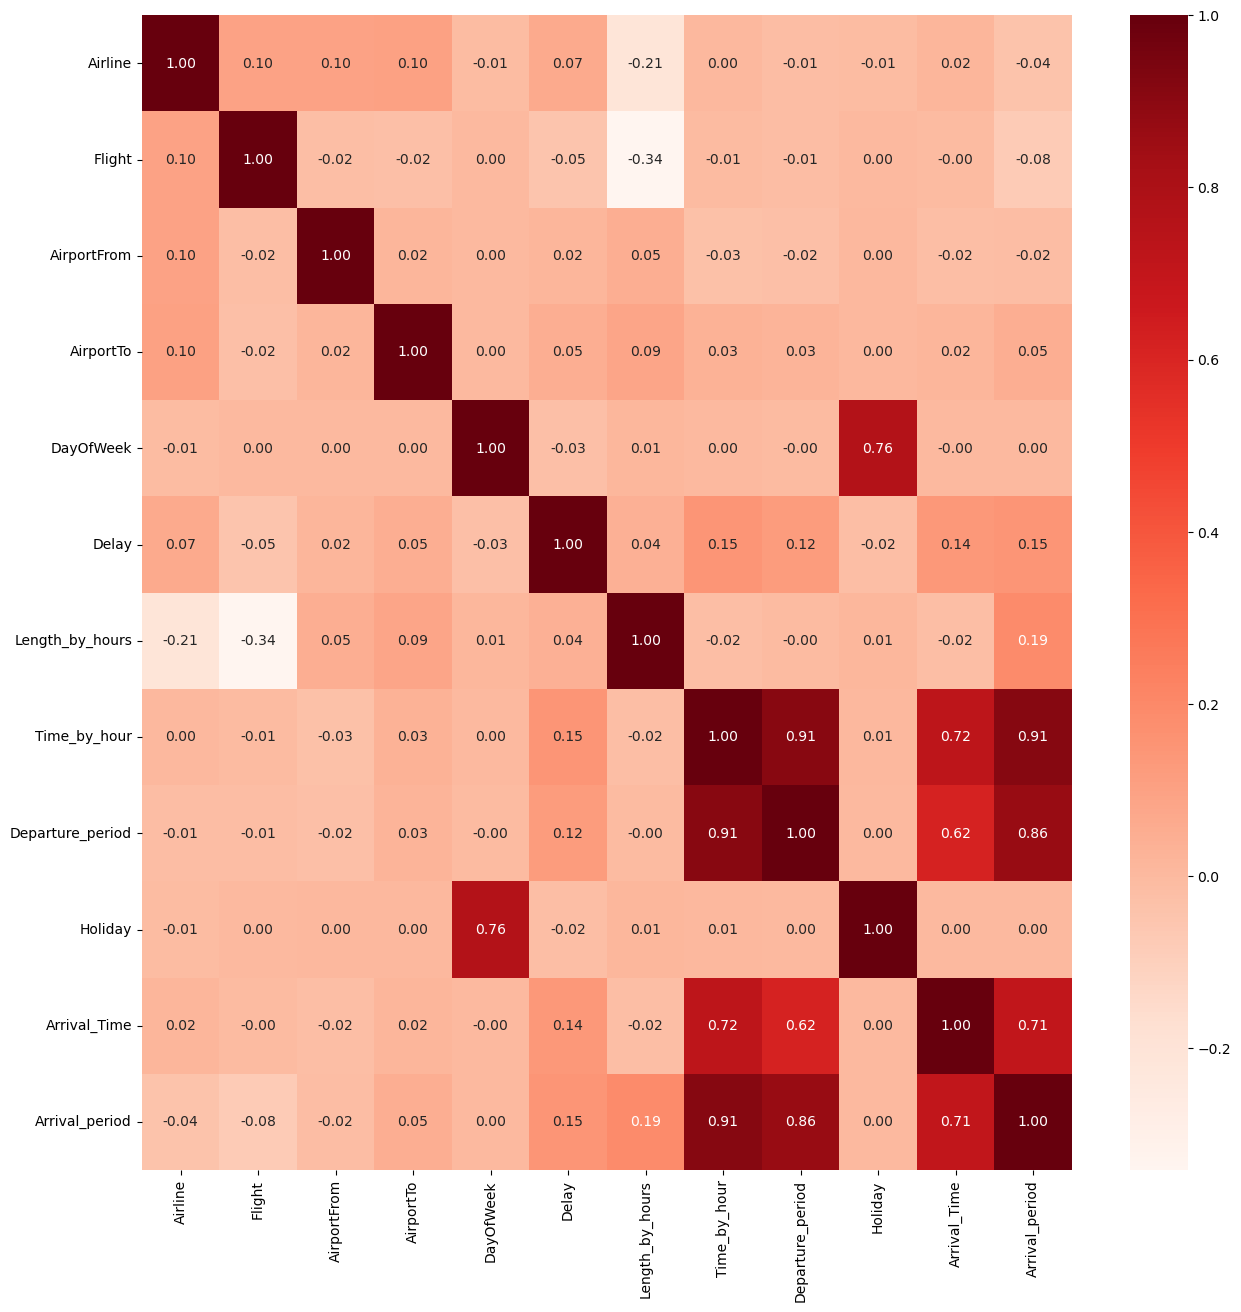

In [31]:
plt.figure(figsize=(15,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

In [32]:
X = df.drop(columns='Delay')
y = df['Delay']

In [43]:
X

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Length_by_hours,Time_by_hour,Departure_period,Holiday,Arrival_Time,Arrival_period
0,4,269,253,135,3,3.416667,0.250000,3,0,3.666667,3
1,14,1558,217,60,3,3.700000,0.250000,3,0,3.950000,3
2,1,2400,154,80,3,2.750000,0.333333,3,0,3.083333,3
3,1,2466,253,80,3,3.250000,0.333333,3,0,3.583333,3
4,2,108,14,252,3,3.366667,0.500000,3,0,3.866667,3
...,...,...,...,...,...,...,...,...,...,...,...
539378,4,178,203,264,5,5.433333,23.983333,3,0,5.416667,0
539379,8,398,252,16,5,5.083333,23.983333,3,0,5.066667,0
539380,8,609,253,184,5,4.250000,23.983333,3,0,4.233333,3
539381,13,78,128,253,5,5.216667,23.983333,3,0,5.200000,0


In [44]:
y

0         1
1         1
2         1
3         1
4         0
         ..
539378    0
539379    0
539380    0
539381    1
539382    1
Name: Delay, Length: 539383, dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=20, shuffle=True)

# Some ML Models

In [34]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='entropy',max_depth=16,random_state=40)
DecisionTreeClassifierModel.fit(X_train, y_train)

print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))

DecisionTreeClassifierModel Train Score is :  1.0
DecisionTreeClassifierModel Test Score is :  0.5529281763858478


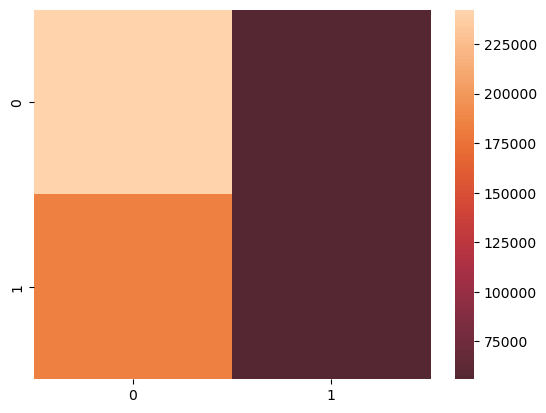

Confusion Matrix is
 [[242353  56750]
 [184384  55876]]


In [35]:
y_pred_DT = DecisionTreeClassifierModel.predict(X_test)

CM_DT = confusion_matrix(y_test, y_pred_DT)
sns.heatmap(CM_DT, center=True)
plt.show()

print('Confusion Matrix is\n', CM_DT)

In [36]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'entropy', max_depth=18, n_estimators=400, random_state=44)
RandomForestClassifierModel.fit(X_train, y_train)

print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))

RandomForestClassifierModel Train Score is :  1.0
RandomForestClassifierModel Test Score is :  0.5587795232524293


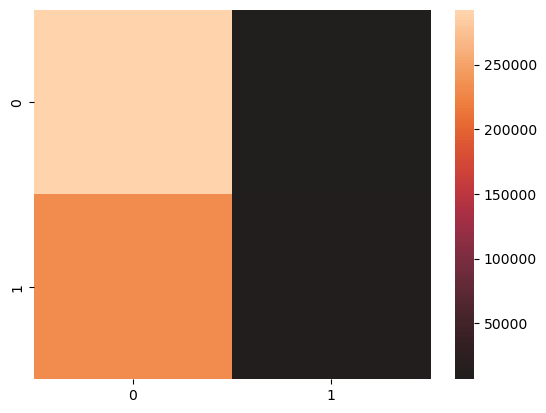

Confusion Matrix is
 [[292555   6548]
 [231430   8830]]


In [37]:
y_pred_RF = RandomForestClassifierModel.predict(X_test)
CM_RF = confusion_matrix(y_test, y_pred_RF)

sns.heatmap(CM_RF, center=True)
plt.show()

print('Confusion Matrix is\n', CM_RF)

In [38]:
GBCModel = GradientBoostingClassifier(n_estimators=300, max_depth=8, learning_rate=0.25, random_state=44)
GBCModel.fit(X_train, y_train)
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))

GBCModel Train Score is :  1.0
GBCModel Test Score is :  0.5318236512330285


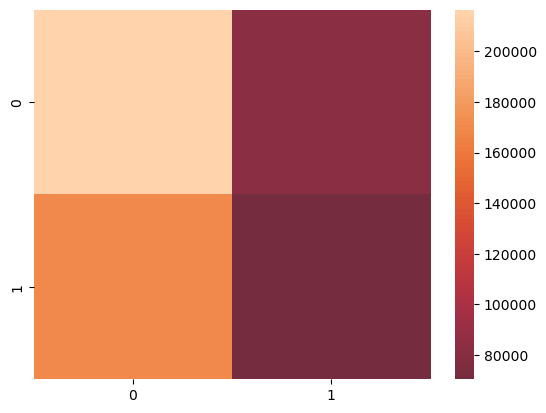

Confusion Matrix is
 [[216411  82692]
 [169825  70435]]


In [39]:
y_pred_GB = GBCModel.predict(X_test)
CM_GB = confusion_matrix(y_test, y_pred_GB)

sns.heatmap(CM_GB, center=True)
plt.show()

print('Confusion Matrix is\n', CM_GB)

In [40]:
VotingClassifierModel = VotingClassifier(estimators=[('GBCModel',GBCModel),
                                                     ('RFCModel',RandomForestClassifierModel),
                                                     ('TDCModel',DecisionTreeClassifierModel)],
                                         voting='hard')
VotingClassifierModel.fit(X_train, y_train)
print('VotingClassifierModel Train Score is : ' , VotingClassifierModel.score(X_train, y_train))
print('VotingClassifierModel Test Score is : ' , VotingClassifierModel.score(X_test, y_test))

VotingClassifierModel Train Score is :  1.0
VotingClassifierModel Test Score is :  0.5539775624208557


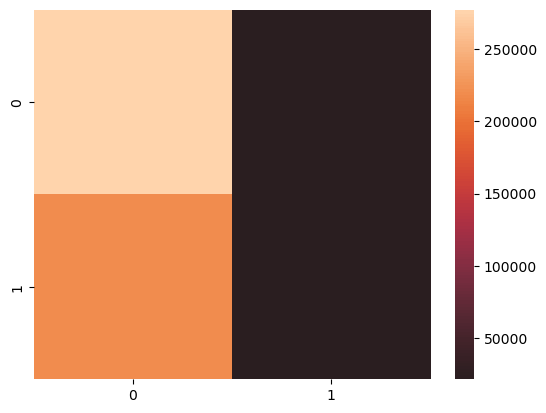

Confusion Matrix is
 [[277143  21960]
 [218608  21652]]


In [41]:
y_pred_V = VotingClassifierModel.predict(X_test)
CM_V = confusion_matrix(y_test, y_pred_V)
sns.heatmap(CM_V, center=True)
plt.show()
print('Confusion Matrix is\n', CM_V)